In [2]:
import pandas as pd
import numpy as np
import seaborn as sn

In [3]:
#create a DataFrame
zip_df = pd.read_csv('zip_code_demographics.csv')

In [4]:
zip_df.head()

,zip,lat,lng,city,state_id,state_name,population,density,county_name,po_box,dist_highway,dist2_large_airport,dist2_medium_airport,dist_to_shore,number_of_business,adjusted_gross_income,total_income_amount,number_of_returns
0,1001,42.06262,-72.62521,Agawam,MA,Massachusetts,16088,550.1,Hampden,0,1.387035,106.145765,12.946212,93.049251,438.0,598807,6.047690e+05,9320
1,1002,42.37633,-72.46462,Amherst,MA,Massachusetts,27323,198.1,Hampshire,0,14.438177,112.264368,21.080079,133.370144,571.0,989558,1.005796e+06,9880
2,1005,42.42117,-72.10655,Barre,MA,Massachusetts,4947,44.2,Worcester,0,16.788339,90.664964,25.547718,97.639881,97.0,164207,1.660540e+05,2490
3,1007,42.28163,-72.40009,Belchertown,MA,Massachusetts,15304,107.7,Hampshire,0,13.663839,101.552921,14.762395,114.406034,217.0,647074,6.547390e+05,7970
4,1008,42.18234,-72.95819,Blandford,MA,Massachusetts,1171,7.4,Hampden,0,2.593655,136.548797,20.177950,107.466779,18.0,47826,4.824100e+04,660


In [5]:
#how many columns and rows
zip_df.shape

(33704, 18)

In [6]:
#attributes of the DataFrame
zip_df.columns

Index(['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', 'population',
       'density', 'county_name', 'po_box', 'dist_highway',
       'dist2_large_airport', 'dist2_medium_airport', 'dist_to_shore',
       'number_of_business', 'adjusted_gross_income', 'total_income_amount',
       'number_of_returns'],
      dtype='object')

In [7]:
#number of biz and distance to shore
sho_df = zip_df[['state_id', 'city', 'number_of_business','dist_to_shore']]
sho_df.head()

,state_id,city,number_of_business,dist_to_shore
0,MA,Agawam,438.0,93.049251
1,MA,Amherst,571.0,133.370144
2,MA,Barre,97.0,97.639881
3,MA,Belchertown,217.0,114.406034
4,MA,Blandford,18.0,107.466779


In [8]:
#combine columns
sho_df['city'] = sho_df['city'] + ', ' + sho_df['state_id']
sho_df

/var/folders/j5/3rry1w9s6819d90x12dk94gr0000gq/T/ipykernel_10427/827289575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sho_df['city'] = sho_df['city'] + ', ' + sho_df['state_id']


,state_id,city,number_of_business,dist_to_shore
0,MA,"Agawam, MA",438.0,93.049251
1,MA,"Amherst, MA",571.0,133.370144
2,MA,"Barre, MA",97.0,97.639881
3,MA,"Belchertown, MA",217.0,114.406034
4,MA,"Blandford, MA",18.0,107.466779
...,...,...,...,...
33699,NC,"Southern Pines, NC",637.0,172.197809
33700,NC,"Spruce Pine, NC",280.0,402.428512
33701,KY,"Louisville, KY",1133.0,400.646608
33702,KY,"Louisville, KY",270.0,403.729631


In [9]:
#delete state_id column
sho_df = sho_df.drop('state_id', axis=1)
sho_df

,city,number_of_business,dist_to_shore
0,"Agawam, MA",438.0,93.049251
1,"Amherst, MA",571.0,133.370144
2,"Barre, MA",97.0,97.639881
3,"Belchertown, MA",217.0,114.406034
4,"Blandford, MA",18.0,107.466779
...,...,...,...
33699,"Southern Pines, NC",637.0,172.197809
33700,"Spruce Pine, NC",280.0,402.428512
33701,"Louisville, KY",1133.0,400.646608
33702,"Louisville, KY",270.0,403.729631


In [10]:
#Checking datatypes of columns
sho_df.dtypes

city                   object
number_of_business    float64
dist_to_shore         float64
dtype: object

In [11]:
#cleaning up dist_to_shore column to have 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
sho_df

,city,number_of_business,dist_to_shore
0,"Agawam, MA",438.00,93.05
1,"Amherst, MA",571.00,133.37
2,"Barre, MA",97.00,97.64
3,"Belchertown, MA",217.00,114.41
4,"Blandford, MA",18.00,107.47
...,...,...,...
33699,"Southern Pines, NC",637.00,172.20
33700,"Spruce Pine, NC",280.00,402.43
33701,"Louisville, KY",1133.00,400.65
33702,"Louisville, KY",270.00,403.73


In [13]:
#sort by number of business"
sho_df_sorted = sho_df.sort_values(by='number_of_business', ascending=False)
sho_df_sorted.head()

,city,number_of_business,dist_to_shore
2188,"New York, NY",7263.00,17.01
27902,"New York, NY",7263.00,17.21
27916,"New York, NY",7263.00,17.22
27899,"New York, NY",6801.00,18.55
27896,"New York, NY",6801.00,18.55


In [15]:
#counting unique values in city column
count_unique = len(pd.unique(sho_df_sorted['city']))
print("The number of unique values in city is:", count_unique)

The number of unique values in city is: 27885


In [16]:
#counting unique values in number of business column
count_unique2 = len(pd.unique(sho_df_sorted['number_of_business']))
print("The number of unique values in city is:", count_unique2)

The number of unique values in city is: 1885


In [18]:
#drop duplicates
sho_df_sorted.drop_duplicates()
sho_df_sorted.shape

(33704, 3)

In [ ]:
#top 20 cities with the most businesses

In [ ]:
top_cities_biz = sho_df_sorted.head(20)
top_cities_biz

In [20]:
uniq_df = sho_df_sorted.drop_duplicates()
uniq_df.shape

(33675, 3)

In [29]:
sho_df_sorted2 = uniq_df.sort_values(by='dist_to_shore', ascending=True)
top_10_cities = sho_df_sorted2.head(10)
top_10_cities

,city,number_of_business,dist_to_shore
13505,"Luna Pier, MI",12.00,0.01
29455,"Captiva, FL",89.00,0.01
27180,"Bellingham, WA",1993.00,0.02
33633,"Petersburg, AK",147.00,0.02
27775,"Matinicus, ME",69.00,0.02
8987,"Key West, FL",1546.00,0.07
5241,"Issue, MD",8.00,0.09
27770,"Sunset, ME",7.00,0.10
29164,"Ocracoke, NC",18.00,0.10
29533,"Montrose, AL",802.00,0.14


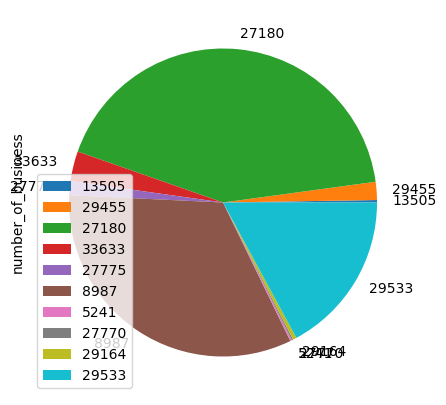

In [30]:
plot = top_10_cities.plot.pie(y='number_of_business', figsize=(5, 5))

In [28]:
import matplotlib.pyplot as plt

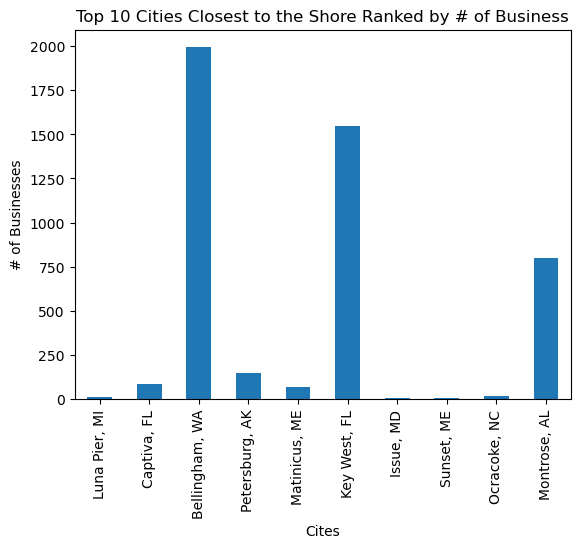

In [42]:
#Charting the cities closest to the shore
top_10_cities.plot(x='city', y='number_of_business', kind='bar', title='Top 10 Cities Closest to the Shore Ranked by # of Business', legend=False)
plt.xlabel('Cites')
plt.ylabel('# of Businesses')
plt.show()

In [44]:
ranked_by_biz = top_10_cities.sort_values(by='number_of_business', ascending=False)
ranked_by_biz

,city,number_of_business,dist_to_shore
27180,"Bellingham, WA",1993.00,0.02
8987,"Key West, FL",1546.00,0.07
29533,"Montrose, AL",802.00,0.14
33633,"Petersburg, AK",147.00,0.02
29455,"Captiva, FL",89.00,0.01
27775,"Matinicus, ME",69.00,0.02
29164,"Ocracoke, NC",18.00,0.10
13505,"Luna Pier, MI",12.00,0.01
5241,"Issue, MD",8.00,0.09
27770,"Sunset, ME",7.00,0.10


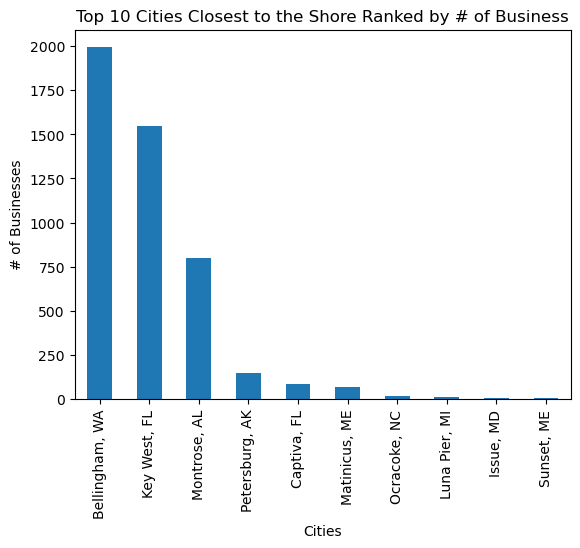

In [46]:
#Charting the cities closest to the shore ranked by number of businesses
ranked_by_biz.plot(x='city', y='number_of_business', kind='bar', title='Top 10 Cities Closest to the Shore Ranked by # of Business', legend=False)
plt.xlabel('Cities')
plt.ylabel('# of Businesses')
plt.show()

### Top 10 Cities By The Shore Ranked by # of Businesses

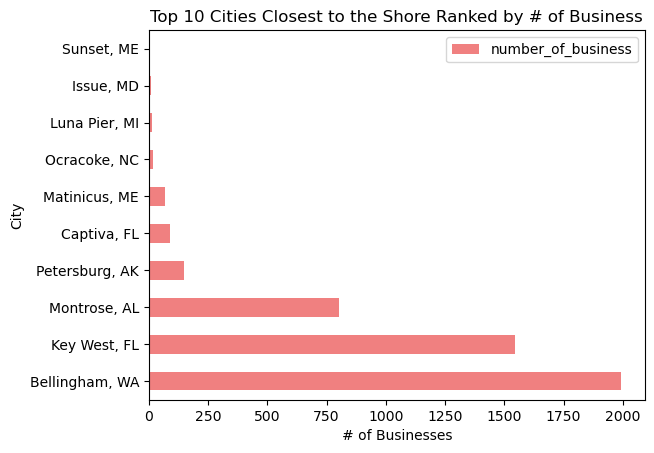

In [47]:

ranked_by_biz.plot.barh(x='city', y='number_of_business', color='lightcoral')
plt.xlabel('# of Businesses')
plt.ylabel('City')
plt.title('Top 10 Cities Closest to the Shore Ranked by # of Business')
plt.show()

In [ ]:
palette_color = sn.color_palette('bright')
plt.pie(top_10_cities['number_of_business'], labels=top_10_cities['city'], colors=palette_color, autopct='%.0f%%')
plt.title('Top 10 Cities Closest to The Shore')
plt.show()